<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_def_find_LCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a binary tree, find the lowest common ancestor (LCA) of two given nodes in the tree. Assume that each node in the tree also has a pointer to its parent.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes v and w as the lowest node in T that has both v and w as descendants (where we allow a node to be a descendant of itself).”

##Solution:
To solve this problem, we will implement a function to find the Lowest Common Ancestor (LCA) of two nodes in a binary tree. Given that each node has a pointer to its parent, we can traverse upwards from both nodes until we find the common ancestor.

1. **Model**: Define a class for a binary tree node, including pointers to its left, right, and parent.
2. **Controller**: Implement the function `find_LCA` that takes two nodes and returns their LCA.
3. **View**: Run a set of test cases to demonstrate the function's correctness.



##Implementation:

In [1]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
def find_LCA(node1, node2):
    ancestors = set()

    # Traverse upwards from node1 and add all ancestors to the set
    while node1:
        ancestors.add(node1)
        node1 = node1.parent

    # Traverse upwards from node2 and check for common ancestor
    while node2:
        if node2 in ancestors:
            return node2
        node2 = node2.parent

    return None
# Create nodes
root = TreeNode('A')
nodeB = TreeNode('B')
nodeC = TreeNode('C')
nodeD = TreeNode('D')
nodeE = TreeNode('E')
nodeF = TreeNode('F')
nodeG = TreeNode('G')

# Build the tree
root.left = nodeB
root.right = nodeC
nodeB.parent = root
nodeC.parent = root
nodeB.left = nodeD
nodeB.right = nodeE
nodeD.parent = nodeB
nodeE.parent = nodeB
nodeC.left = nodeF
nodeC.right = nodeG
nodeF.parent = nodeC
nodeG.parent = nodeC

# Test cases
print(find_LCA(nodeD, nodeE).value) # Should return 'B'
print(find_LCA(nodeD, nodeG).value) # Should return 'A'
print(find_LCA(nodeE, nodeF).value) # Should return 'A'


B
A
A


##Testing:
Different views created to implement different levels of graphical test results.

In [2]:
# Create nodes
root = TreeNode('A')
nodeB = TreeNode('B')
nodeC = TreeNode('C')
nodeD = TreeNode('D')
nodeE = TreeNode('E')
nodeF = TreeNode('F')
nodeG = TreeNode('G')

# Build the tree
root.left = nodeB
root.right = nodeC
nodeB.parent = root
nodeC.parent = root
nodeB.left = nodeD
nodeB.right = nodeE
nodeD.parent = nodeB
nodeE.parent = nodeB
nodeC.left = nodeF
nodeC.right = nodeG
nodeF.parent = nodeC
nodeG.parent = nodeC

# Test cases
print(find_LCA(nodeD, nodeE).value) # Should return 'B'
print(find_LCA(nodeD, nodeG).value) # Should return 'A'
print(find_LCA(nodeE, nodeF).value) # Should return 'A'


B
A
A


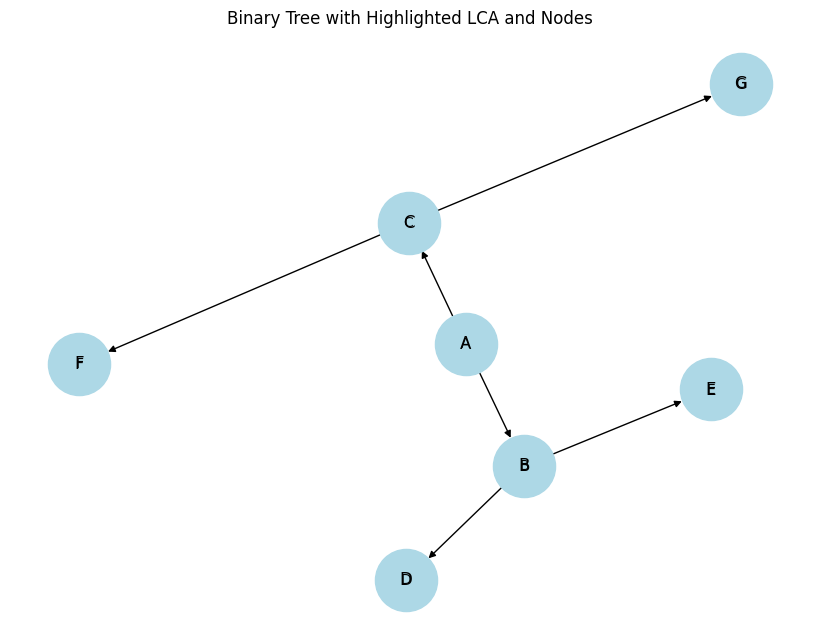

LCA of D and E is: B


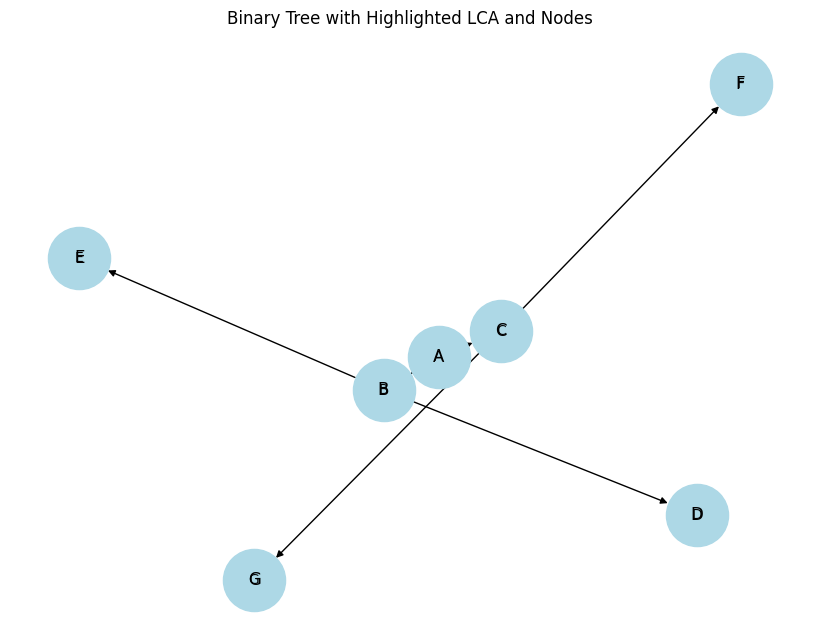

LCA of D and G is: A


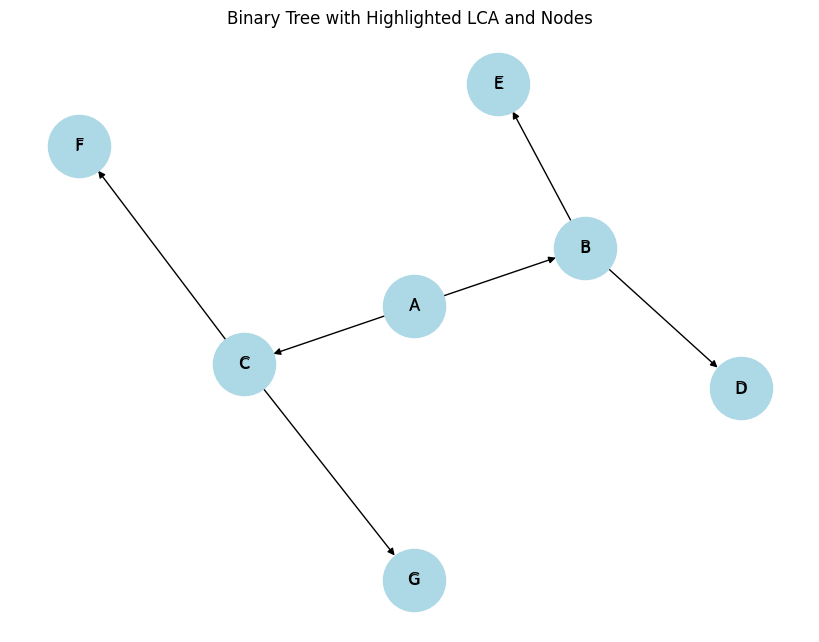

LCA of E and F is: A


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from typing import Tuple

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

def find_LCA(node1, node2):
    ancestors = set()
    while node1:
        ancestors.add(node1)
        node1 = node1.parent
    while node2:
        if node2 in ancestors:
            return node2
        node2 = node2.parent
    return None

def add_edges(graph, node):
    """Recursively add edges to the graph from the binary tree."""
    if node.left:
        graph.add_edge(node.value, node.left.value)
        add_edges(graph, node.left)
    if node.right:
        graph.add_edge(node.value, node.right.value)
        add_edges(graph, node.right)

def draw_tree(root, highlight_nodes: Tuple[TreeNode, TreeNode, TreeNode]):
    """Draws the binary tree and highlights the LCA and the nodes of interest."""
    graph = nx.DiGraph()
    add_edges(graph, root)

    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))

    # Draw the tree
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)

    # Highlight the nodes of interest and LCA
    node_colors = ['orange' if node in highlight_nodes else 'lightblue' for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes(), node_color=node_colors)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Binary Tree with Highlighted LCA and Nodes")
    plt.show()

# Create and populate the binary tree
root = TreeNode('A')
nodeB = TreeNode('B')
nodeC = TreeNode('C')
nodeD = TreeNode('D')
nodeE = TreeNode('E')
nodeF = TreeNode('F')
nodeG = TreeNode('G')

root.left = nodeB; root.right = nodeC
nodeB.parent = root; nodeC.parent = root
nodeB.left = nodeD; nodeB.right = nodeE
nodeD.parent = nodeB; nodeE.parent = nodeB
nodeC.left = nodeF; nodeC.right = nodeG
nodeF.parent = nodeC; nodeG.parent = nodeC

# Test cases with visualization
test_cases = [(nodeD, nodeE), (nodeD, nodeG), (nodeE, nodeF)]
for node1, node2 in test_cases:
    lca = find_LCA(node1, node2)
    draw_tree(root, (node1, node2, lca))
    print(f"LCA of {node1.value} and {node2.value} is: {lca.value if lca else 'None'}")



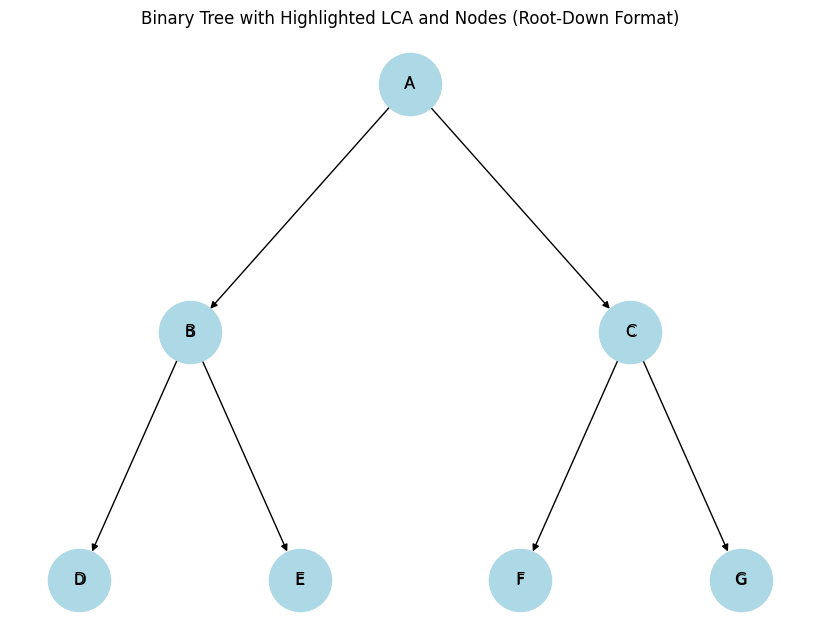

LCA of D and E is: B


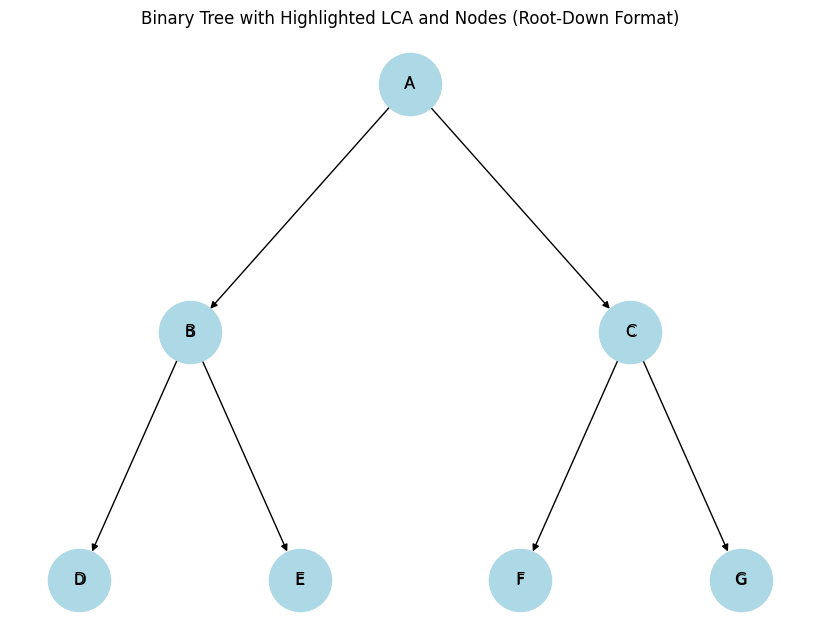

LCA of D and G is: A


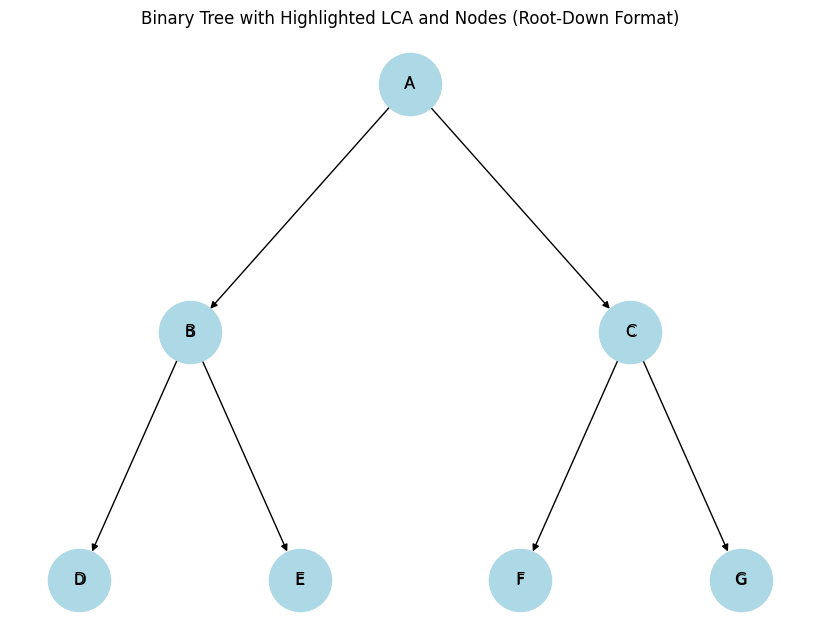

LCA of E and F is: A


In [5]:
def draw_tree_root_down(root, highlight_nodes: Tuple[TreeNode, TreeNode, TreeNode]):
    """Draws the binary tree in a root-down format and highlights the LCA and the nodes of interest."""
    graph = nx.DiGraph()
    add_edges(graph, root)

    # Create hierarchical pos
    pos = hierarchy_pos(graph, root.value)
    plt.figure(figsize=(8, 6))

    # Draw the tree
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)

    # Highlight the nodes of interest and LCA
    node_colors = ['orange' if node in highlight_nodes else 'lightblue' for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes(), node_color=node_colors)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Binary Tree with Highlighted LCA and Nodes (Root-Down Format)")
    plt.show()

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    """
    Creates a hierarchy pos for a graph G with a specified root.
    """

    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    def _hierarchy_pos(G, root, width=width, vert_gap=vert_gap, vert_loc=vert_loc, xcenter=xcenter,
                       pos=None, parent=None, parsed=[]):
        """
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        """

        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children) != 0:
            dx = width / len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc-vert_gap, xcenter=nextx,
                                     pos=pos, parent=root, parsed=parsed)
        return pos

    return _hierarchy_pos(G, root, width=width, vert_gap=vert_gap,
                          vert_loc=vert_loc, xcenter=xcenter)

# Run test cases with root-down visualization
for node1, node2 in test_cases:
    lca = find_LCA(node1, node2)
    draw_tree_root_down(root, (node1, node2, lca))
    print(f"LCA of {node1.value} and {node2.value} is: {lca.value if lca else 'None'}")

